In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\DataScience\Project\dataset\dwell_time.csv") # change the csv file in the main code..check the bottom of main code where csv is written

In [3]:
df.head(5)

,Counter,In_time,Dwell_time,Cam_no
0,0,4/23/2023 20:09,50,1
1,1,4/23/2023 19:11,44,1
2,2,4/23/2023 17:13,82,1
3,3,4/23/2023 19:15,69,1
4,4,4/23/2023 18:17,78,1


In [4]:
df['In_date']=df['In_time'].str.split(expand=True)[0]

In [5]:
df['In_time']=df['In_time'].str.split(expand=True)[1]

In [6]:
df = df.reindex(['Counter','Dwell_time','In_time','In_date','Cam_no'], axis=1)

In [7]:
df

,Counter,Dwell_time,In_time,In_date,Cam_no
0,0,50,20:09,4/23/2023,1
1,1,44,19:11,4/23/2023,1
2,2,82,17:13,4/23/2023,1
3,3,69,19:15,4/23/2023,1
4,4,78,18:17,4/23/2023,1
...,...,...,...,...,...
92,25,109,18:02,4/23/2023,4
93,26,75,17:03,4/23/2023,4
94,27,31,17:04,4/23/2023,4
95,28,43,17:05,4/23/2023,4


In [ ]:
df[df]

In [8]:
Q1 = df['Dwell_time'].quantile(0.25)
Q3 = df['Dwell_time'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = max(0,Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['Dwell_time'] >= lower_bound) & (df['Dwell_time'] <= upper_bound)]


44.0
0
143.0
    Counter  Dwell_time In_time    In_date  Cam_no
0         0          50   20:09  4/23/2023       1
1         1          44   19:11  4/23/2023       1
2         2          82   17:13  4/23/2023       1
3         3          69   19:15  4/23/2023       1
4         4          78   18:17  4/23/2023       1
..      ...         ...     ...        ...     ...
92       25         109   18:02  4/23/2023       4
93       26          75   17:03  4/23/2023       4
94       27          31   17:04  4/23/2023       4
95       28          43   17:05  4/23/2023       4
96       30          78   17:07  4/23/2023       4

[97 rows x 5 columns]


In [9]:
# a=df[(df['In_time'] >= '20:00:00')& (df['In_time'] < '22:00:00') & (df['Cam_no']==4)]
# len(a["Counter"])

In [10]:
# df_cam1=df[df['Cam_no']==1] # dataset of cam1

In [11]:
# df_cam2=df[df['Cam_no']==2]  # dataset of cam2

In [12]:
# df_cam3=df[df['Cam_no']==3] # dataset of cam3

In [13]:
# df_cam4=df[df['Cam_no']==4]   # dataset of cam4

In [14]:
total_no=filtered_df.groupby("Cam_no")['Counter'].agg([len])
total_no

,len
Cam_no,
1,29
2,28
3,13
4,27


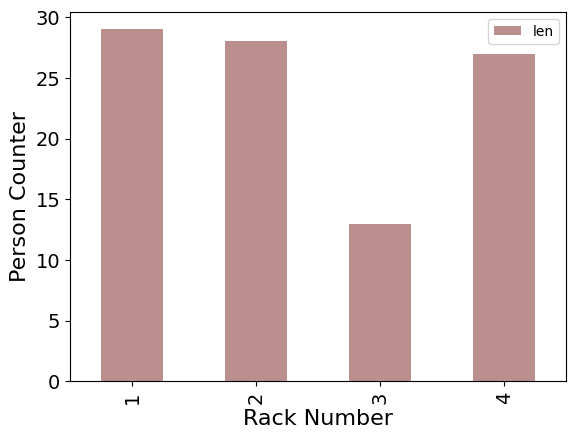

In [15]:
total_no.plot(kind='bar',color='rosybrown',fontsize=14)
plt.xlabel('Rack Number',fontsize=16)
plt.ylabel('Person Counter',fontsize=16)
# plt.title('Person Counter for Each Rack')
plt.legend()
plt.show()


In [16]:
mean_dwell_time = filtered_df.groupby("Cam_no")['Dwell_time'].agg(["mean"])
mean_dwell_time

,mean
Cam_no,
1,54.448276
2,65.785714
3,26.307692
4,64.777778


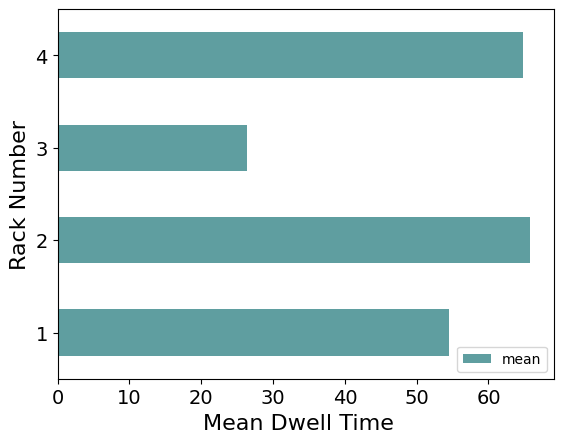

In [17]:

mean_dwell_time.plot(kind='barh',color="cadetblue",fontsize=14)
plt.ylabel('Rack Number',fontsize=16)
plt.xlabel('Mean Dwell Time  ',fontsize=16)
# plt.title('Mean Dwell Time for Each Rack',fontsize=16)
plt.show()

In [18]:
in_time_group = df.groupby("In_time")['Dwell_time'].agg(["count"])
in_time_group

,count
In_time,
12:00,2
12:01,1
12:07,1
12:08,1
12:09,1
...,...
19:17,1
19:23,1
19:27,1


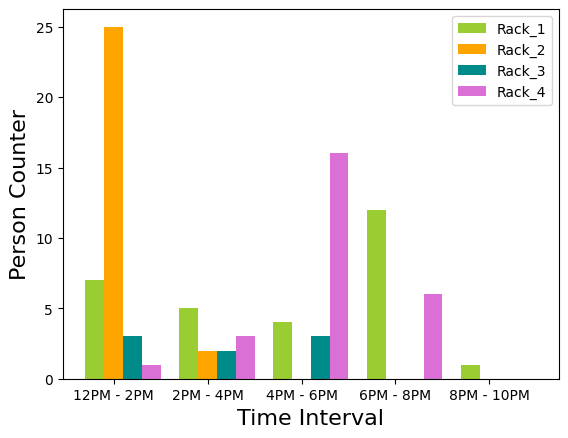

In [19]:
X=['12PM - 2PM','2PM - 4PM','4PM - 6PM','6PM - 8PM','8PM - 10PM']
y1=[7,5,4,12,1]
y2=[25,2,0,0,0]
y3=[3,2,3,0,0]
y4=[1,3,16,6,0]

bar_width = 0.2
bar_positions1 = range(len(X))
bar_positions2 = [pos + bar_width for pos in bar_positions1]
bar_positions3 = [pos + bar_width for pos in bar_positions2]
bar_positions4 = [pos + bar_width for pos in bar_positions3]

# Plotting the bar graph
plt.bar(bar_positions1, y1, width=bar_width, label='Rack_1',color='yellowgreen')
plt.bar(bar_positions2, y2, width=bar_width, label='Rack_2',color='orange')
plt.bar(bar_positions3, y3, width=bar_width, label='Rack_3',color='darkcyan')
plt.bar(bar_positions4, y4, width=bar_width, label='Rack_4',color='orchid')

# Adding labels and title
plt.xlabel('Time Interval',fontsize=16)
plt.ylabel('Person Counter',fontsize=16)
# plt.title('Person Counter in Different Time Intervals For Each Rack',fontsize=16)
plt.xticks(bar_positions2, X)  # Set x-axis ticks to the middle of each group

# Adding legend
plt.legend()

# Display the bar graph
plt.show()

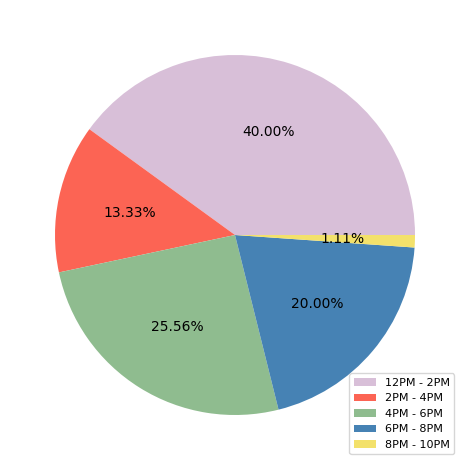

In [20]:
x=['12PM - 2PM','2PM - 4PM','4PM - 6PM','6PM - 8PM','8PM - 10PM']
y=[36,12,23,18,1]
custom_colors = ['thistle', '#FC6454', 'darkseagreen','steelblue', '#F3E16B' ]
plt.pie(x=y,autopct='%0.2f%%',colors=custom_colors,startangle=0)
# plt.title("Total Person Counter for Different Time Intervals",fontsize=16)
plt.legend(x,loc='lower right',fontsize=8)
plt.tight_layout()
plt.show()

In [21]:
total_count = len(df['Counter'])
total_count

97